In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

## Linear Regression

In [10]:
data = load_boston()

In [20]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['price'] = data['target']

In [22]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [94]:
df.drop(columns=['RAD'], inplace=True)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], 
                                                    shuffle=True, test_size=0.1, random_state=4)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [96]:
X_train.shape, X_test.shape

((455, 12), (51, 12))

## Sequential


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nguyen_truong/opt/anaconda3/envs/nmtruong/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


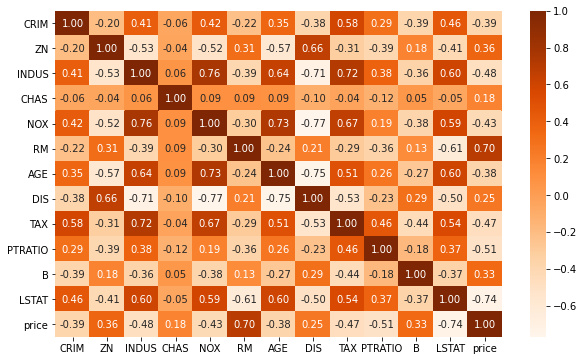

In [97]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Oranges');

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


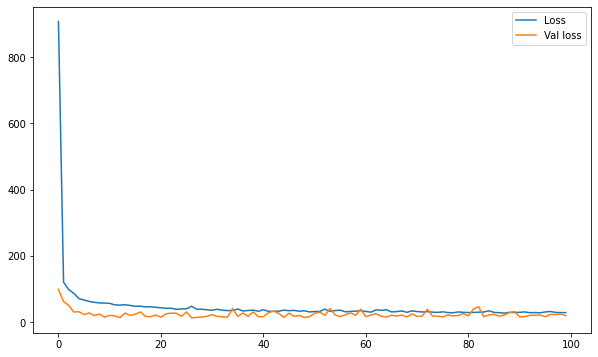

In [102]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), batch_size=8, epochs=100, 
                      validation_split=0.1, verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend(loc='upper right')
plt.show()

- Batch size = 16: 1 lần train đưa vào 16 điểm
- Epoch: Số lần train xong toàn bộ tập data.

In [103]:
y_predicted = model.predict(X_test.to_numpy())
y_predicted = [i[0] for i in y_predicted] 
min(y_predicted)

8.027265

In [104]:
print(mean_squared_error(y_test.to_numpy(), y_predicted))
r2_score(y_test.to_numpy(), y_predicted)

23.74787168236843


0.7109456797748956

In [105]:
pd.DataFrame({'y_true': y_test.to_numpy(), 'y_predicted': y_predicted})

,y_true,y_predicted
0,16.5,8.027265
1,24.8,22.176605
2,17.4,17.439270
3,19.3,14.153237
4,37.6,37.110813
5,24.2,22.596947
6,35.4,32.785065
7,19.9,17.201550
8,27.5,17.343163
9,17.0,19.958900


## Functional